## Read the data ( this is a test video)

In [1]:
import cv2
from cv2 import VideoCapture, imshow, waitKey, destroyAllWindows
from matplotlib import pyplot as plt

In [2]:
# Create video capture object
capture = VideoCapture("Sources/video.mp4") # this is a 5 sec video

# Check that a camera connection has been established
if not capture.isOpened():
    print("Error establishing connection")
    
frames = []

while capture.isOpened():

    # Read an image frame
    ret, frame = capture.read()
    if not ret:
        break
    frames.append(frame)

In [3]:
len(frames)

155

In [4]:
All_faces = []
# detect the face
# Read and process each frame
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
for frame in frames:

    # Convert the frame to grayscale for face detection
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # Detect faces in the frame
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    # Draw rectangles around the detected faces
    x, y, w, h = faces[-1]
    face = frame[y:y+h, x:x+w]
    All_faces.append(face)

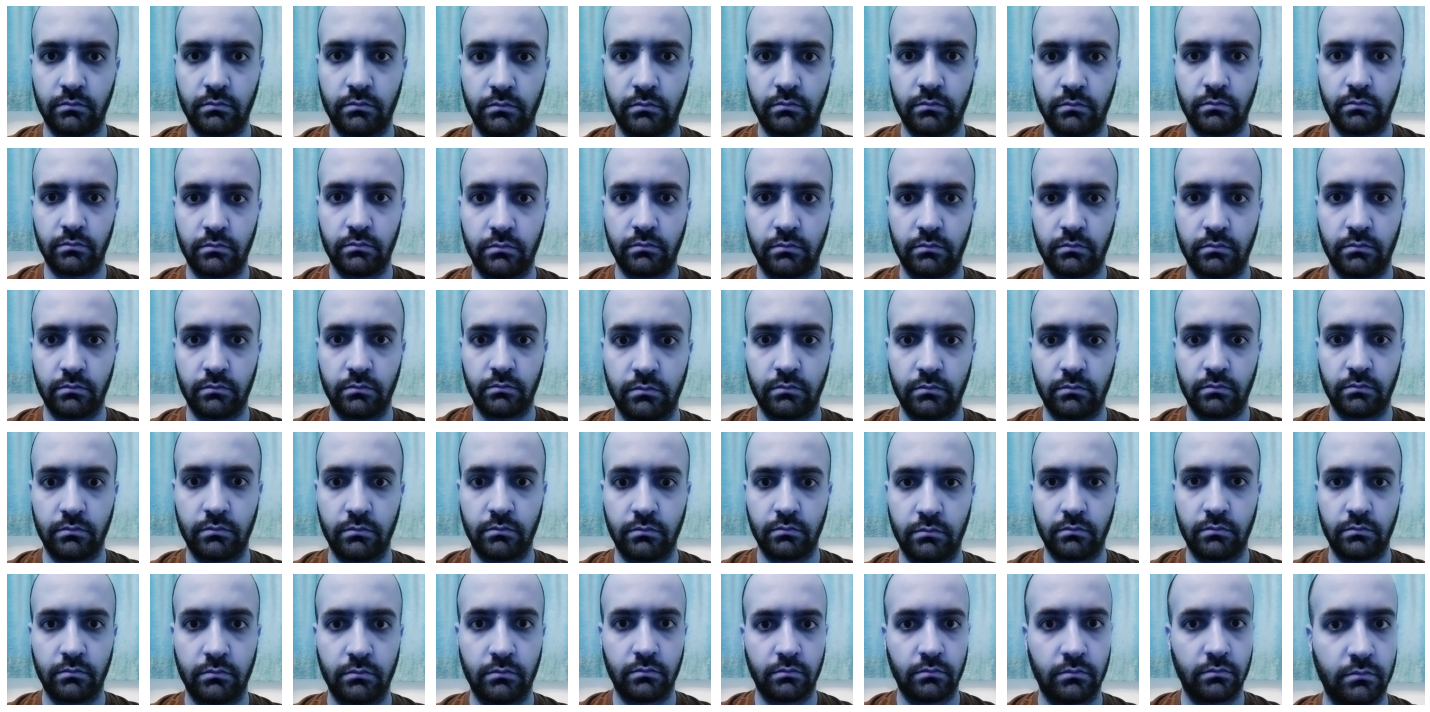

In [5]:
#Let's take a look at the first 50 recognizied faces
fig, axs = plt.subplots(5, 10, figsize=(20, 10))  # 5 rows, 10 columns

# Flattening the axes to easily iterate through subplots
axs = axs.flatten()

for i, ax in enumerate(axs):
    ax.imshow(All_faces[i], cmap='gray')  # Displaying each image
    ax.axis('off')  # Turn off axis labels

plt.tight_layout()  # Adjust layout for better presentation
plt.show()

In [6]:
import pickle
with open('Sources/faces.pickle', 'wb') as handle:
    pickle.dump(All_faces, handle)